In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm
import dataprocesing as dp
import numpy as np
import importlib
import glob

# Eventy

In [2]:
from ezc3d import c3d

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

In [3]:
import dataprocesing as dp
import importlib
def read_events(data_path):
    importlib.reload(dp)
    eventy = dp.read_labels(data_path)

    eventy[0].index('Foot Strike')


    indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
    indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]


    CzasFS = np.zeros(len(indxFS))
    for i in range(len(indxFS)):
        CzasFS[i] = eventy[1][indxFS[i]]

    CzasE = np.zeros(len(indxE))
    for i in range(len(indxE)):
        CzasE[i] = eventy[1][indxE[i]]
    eventy[1].sort()


    p=np.zeros(10)
    d=np.zeros(10)
    j=0
    for i in range(len(eventy[1])):
        if not i >= len(eventy[1])-2:
            pierwszy = eventy[1][i]
            drugi = eventy[1][i+1]
            trzeci = eventy[1][i+2]
            if pierwszy in CzasE:
                if drugi in CzasFS:
                    if trzeci in CzasE:
                        p[j]=pierwszy
                        d[j]=trzeci
                        j+=1
    p=p.astype(int)
    d=d.astype(int)
    
    return[p,d]

# Wybór ścieżki

In [4]:
path="2020-08-05-B0444-S01-E05-T03.c3d"


In [5]:
read_labels(path)

[['Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event',
  'Foot Strike',
  'Event'],
 array([ 3845.,  4875.,  6700.,  7550.,  8460.,  9375., 10490., 11460.,
        12785., 13810., 15195., 16310., 17310., 18455., 19340., 20250.,
        21455., 22720., 23865., 24720., 25750., 26660., 28070.])]

In [6]:
p,d = dp.read_labels(path, 1000)
print(p,d)

[3845, 6700, 8460, 10490, 12785, 15195, 17310, 19340, 21455, 23865, 25750] [6700, 8460, 10490, 12785, 15195, 17310, 19340, 21455, 23865, 25750, 28070]


In [7]:
import sys
from matplotlib.pyplot import subplot
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from matplotlib import scale as mscale
from pyomeca import Analogs

def normalize_data(data_path): 
    muscles = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    muscles_names = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2",
                     "Moment.My2", "Moment.Mz2","Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    muscles_names2 = [["Moment.Mx1"],["Moment.My1"], ["Moment.Mz1"], ["Moment.Mx2"],["Moment.My2"], ["Moment.Mz2"],
                     ["Force.Fx1"],["Force.Fy1"],["Force.Fz1"],["Force.Fx2"],["Force.Fy2"],["Force.Fz2"]]

    emg = Analogs.from_c3d(data_path, usecols=muscles)
#     emg.plot(x="time", col="channel", col_wrap=3)
    emg_p= (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=1, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
    return emg_p


In [8]:
processed=normalize_data(path)

In [9]:
def show_data(processed):
    processed.plot(x="time", col="channel", col_wrap=3)

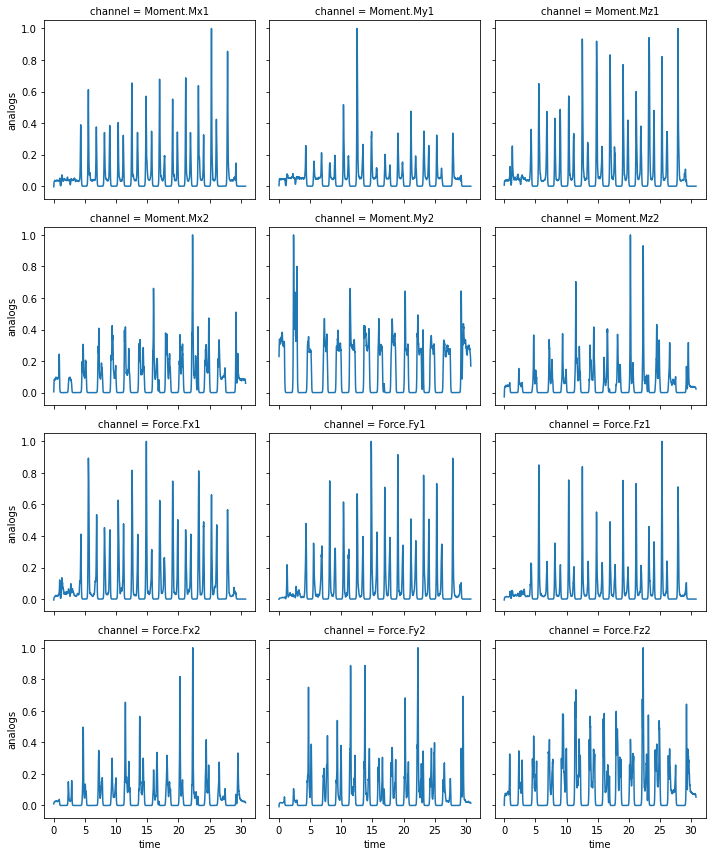

In [10]:
show_data(processed)

In [11]:
def show_events(emg_processed,data_path):
    muscles_names2 = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    p,d=read_events(path)
    for num in range(12):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(10):         
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            plt.plot(emg_processed_event)
            plt.title(muscles_names2[num])
        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()

In [12]:
def show_events_average(emg_processed,data_path):
    muscles_names2 = ["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    #aver_arr=[[]]
    #for t in range(1000):
    #        aver_arr[num].append(0)
    aver_arr=np.zeros((12,1000))  
    
    
    p,d=dp.read_labels(data_path, 1000)
    for j in range(12):
        #aver_arr.append([])
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[j][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
#             plt.plot(time_normalized)     
#             plt.title(muscles_names2[num])
            for t in range(1000):
                aver_arr[j][t]=aver_arr[j][t]+time_normalized.values[t]
                
        aver_arr[j]=aver_arr[j]/10
        time=np.linspace(1,1000,1000)
        plt.plot(time,aver_arr[j])     
        plt.title(muscles_names2[j])
        
        
        subplot(1, 2, 2)
        plt.plot(emg_processed[j])
        plt.title(muscles_names2[j])
        plt.show()
    #print(aver_arr)

In [13]:
# show_events(processed,path)

In [14]:
def show_events_norm(emg_processed,data_path):
    muscles_names2 =["Moment.Mx1","Moment.My1", "Moment.Mz1", "Moment.Mx2","Moment.My2", "Moment.Mz2",
                "Force.Fx1","Force.Fy1","Force.Fz1","Force.Fx2","Force.Fy2","Force.Fz2"]
    p,d=dp.read_labels(data_path, 1000)
    for j in range(12):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):
           
            emg_processed_event=emg_processed[j][p[i]:d[i]]
            emg_processed_event2 = (
            emg_processed_event.meca.abs()
            .meca.normalize(ref=None,scale=1)
            )  
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
            plt.plot(time_normalized)
            plt.title(muscles_names2[j])
        subplot(1, 2, 2)
        plt.plot(emg_processed[0])
        plt.title(muscles_names2[j])
        plt.show()


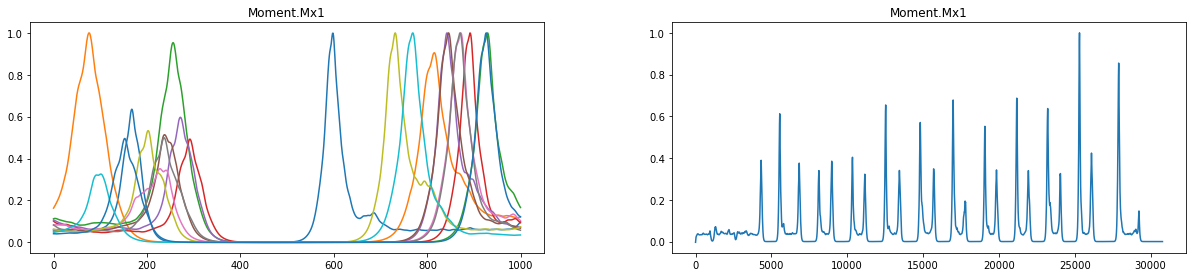

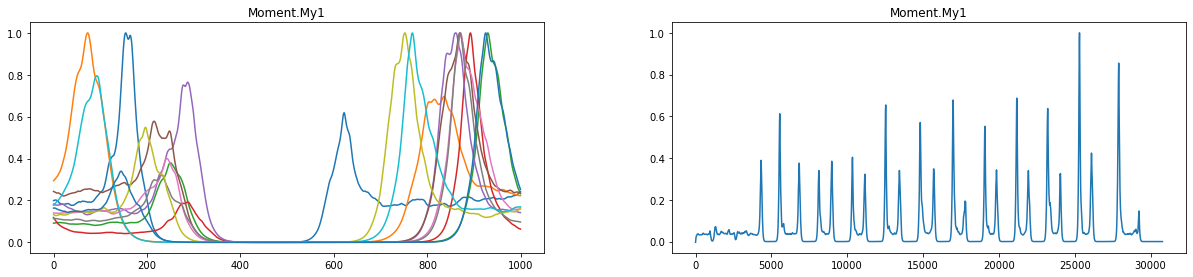

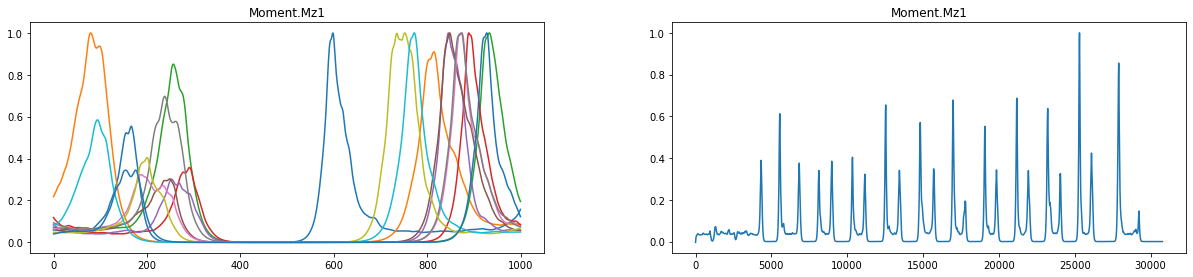

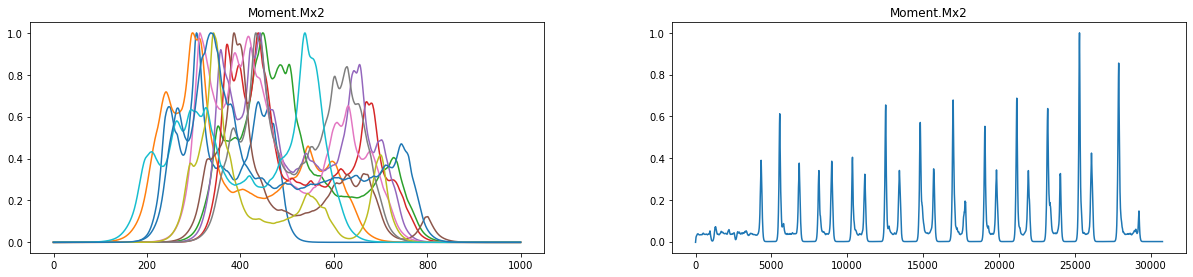

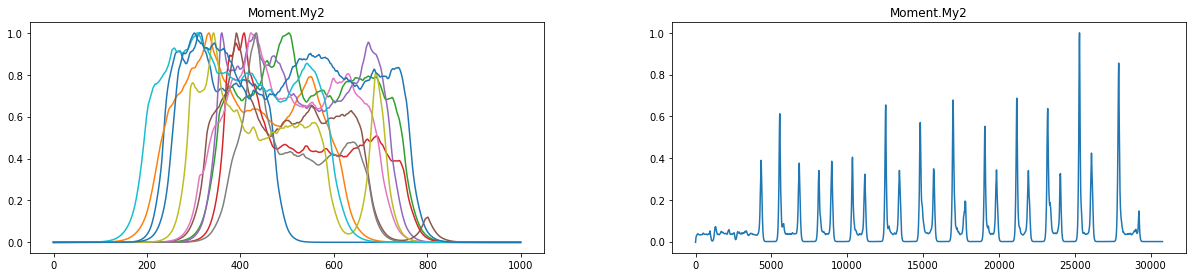

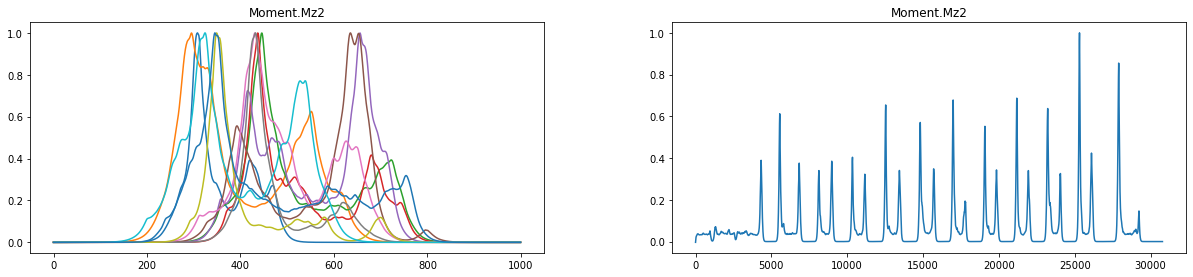

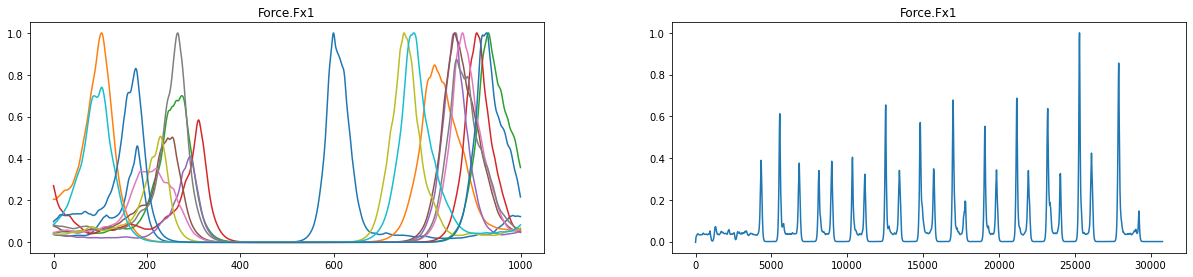

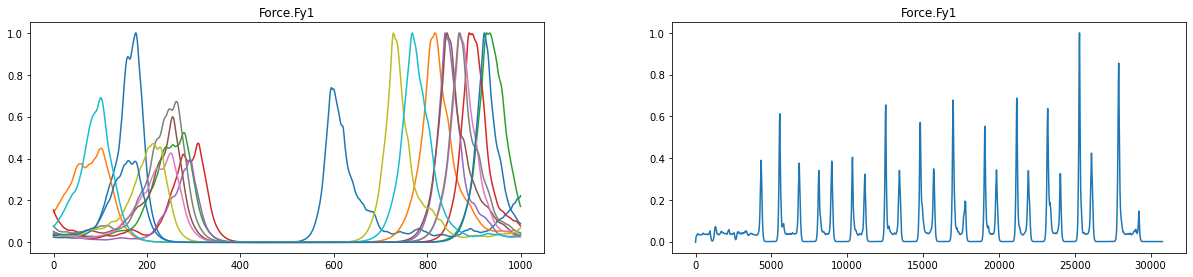

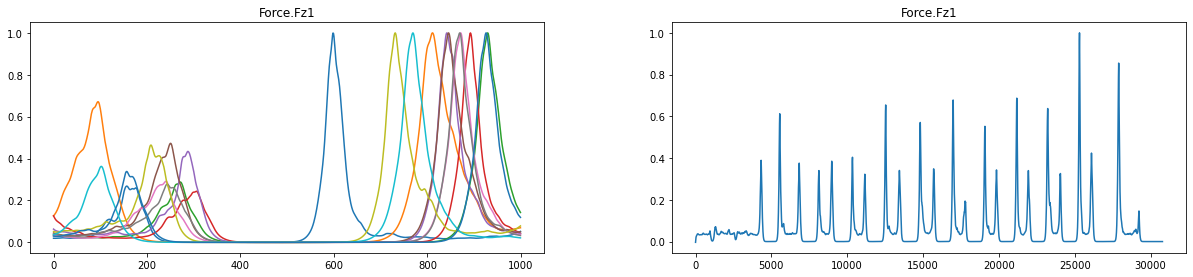

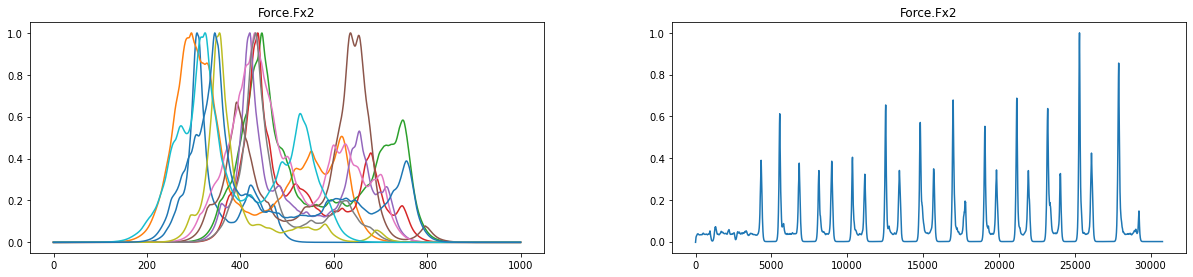

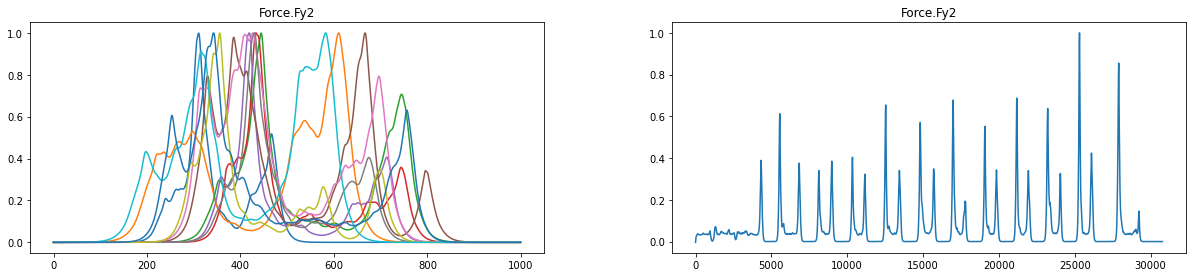

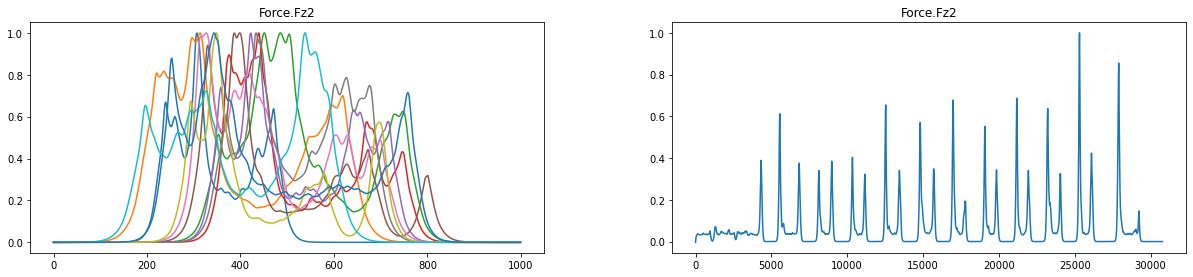

In [15]:
show_events_norm(processed,path)

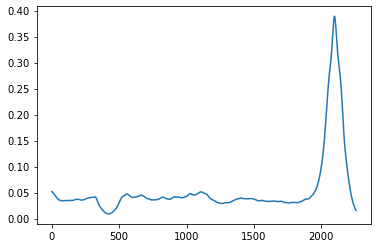

In [16]:
plt.plot(processed[0][2225:4485])

In [17]:
processed[0][2225:4485]

<xarray.DataArray 'analogs' (time: 2260)>
array([0.05222238, 0.05201724, 0.05180279, ..., 0.01663042, 0.01616608,
       0.01571445])
Coordinates:
    channel  <U10 'Moment.Mx1'
  * time     (time) float64 2.225 2.226 2.227 2.228 ... 4.481 4.482 4.483 4.484

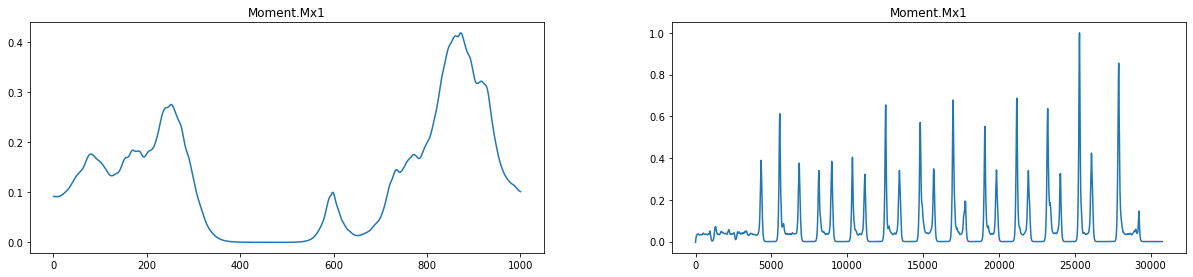

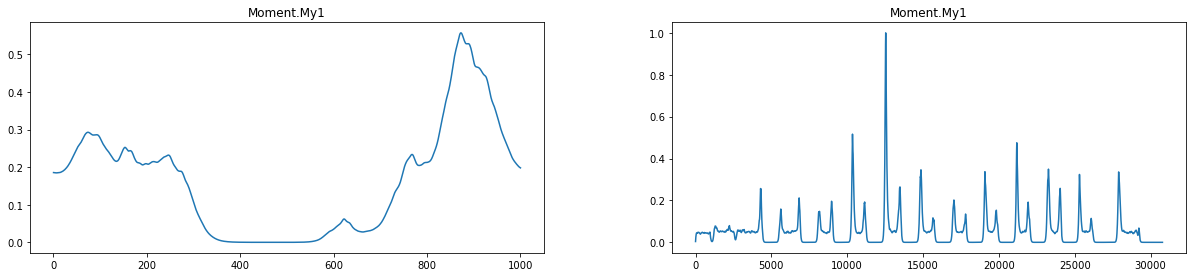

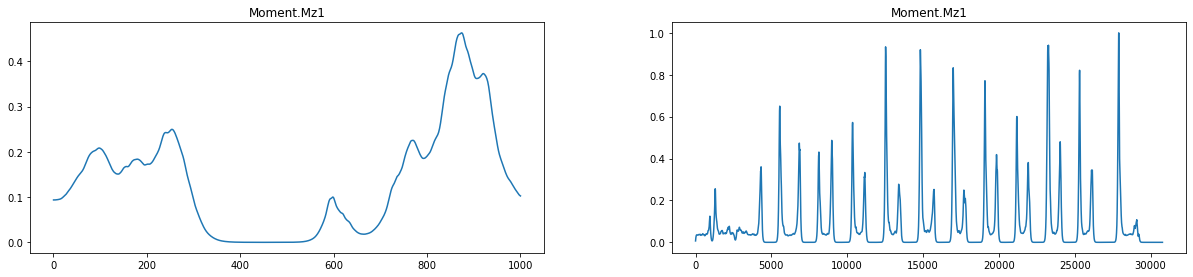

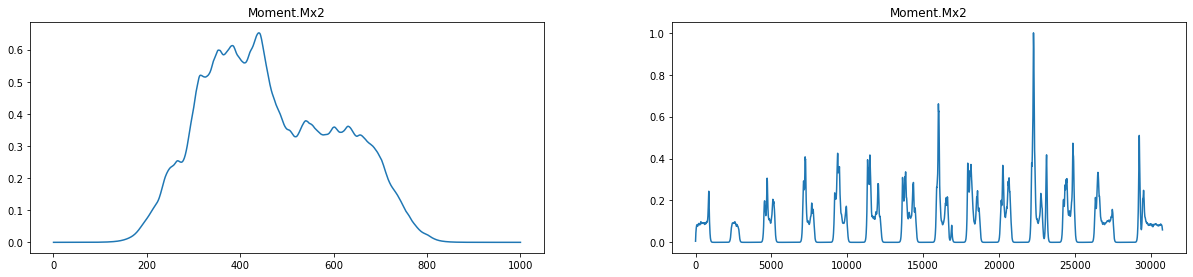

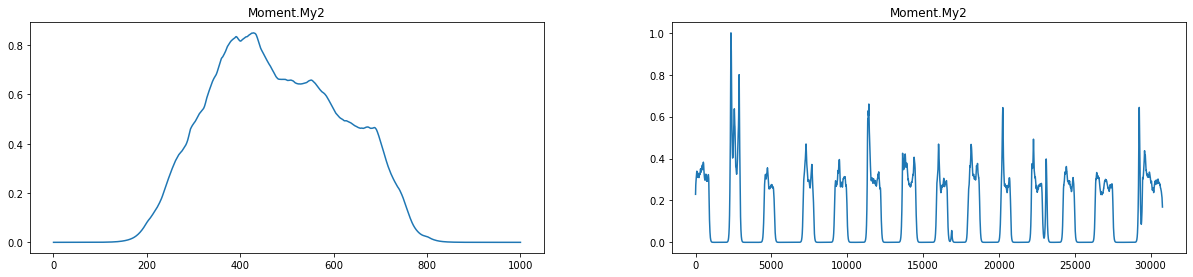

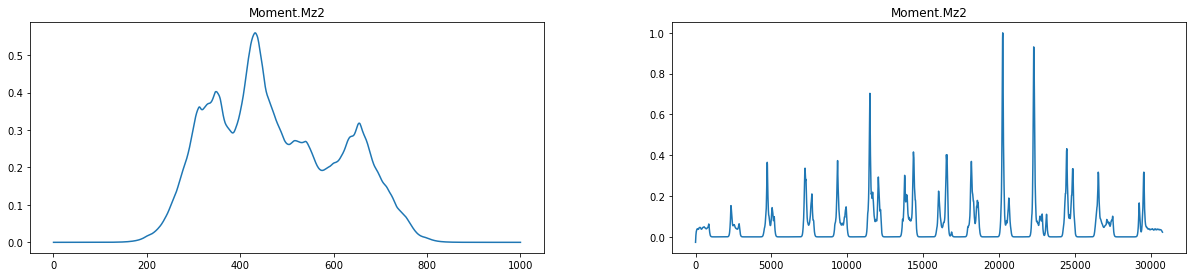

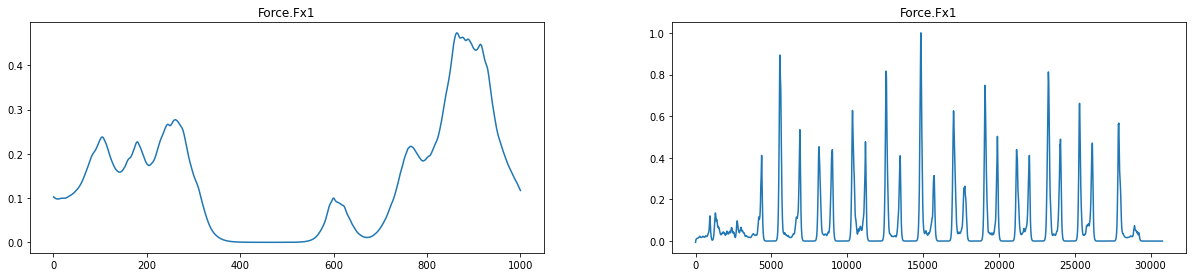

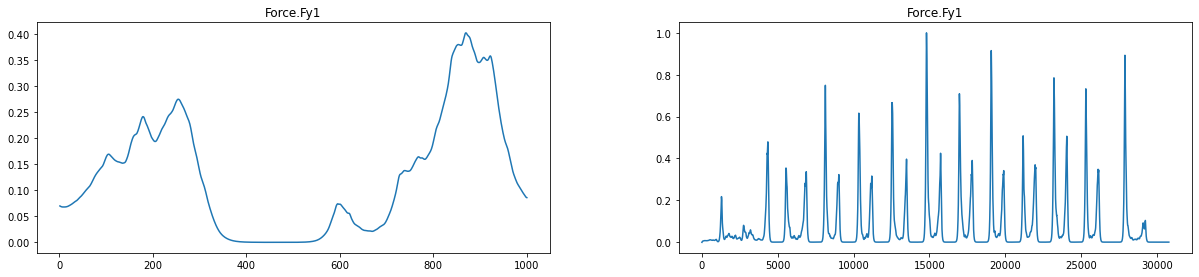

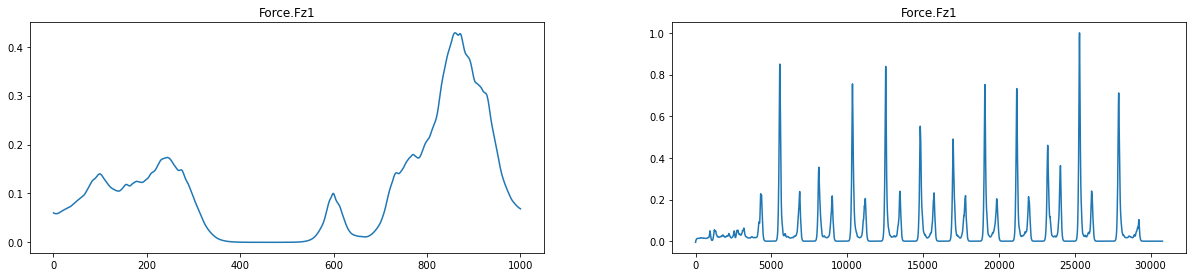

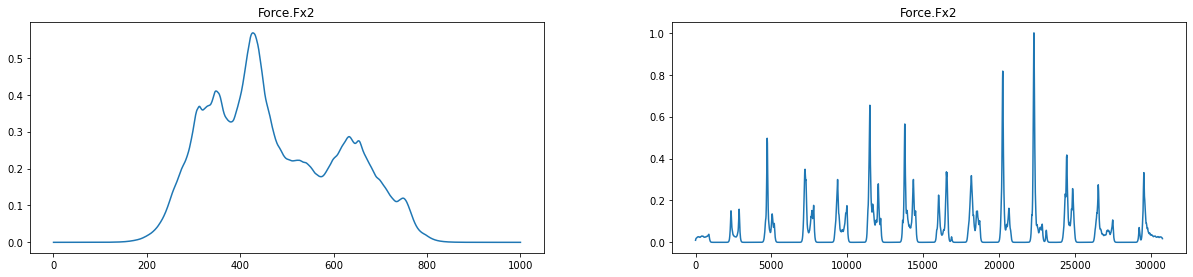

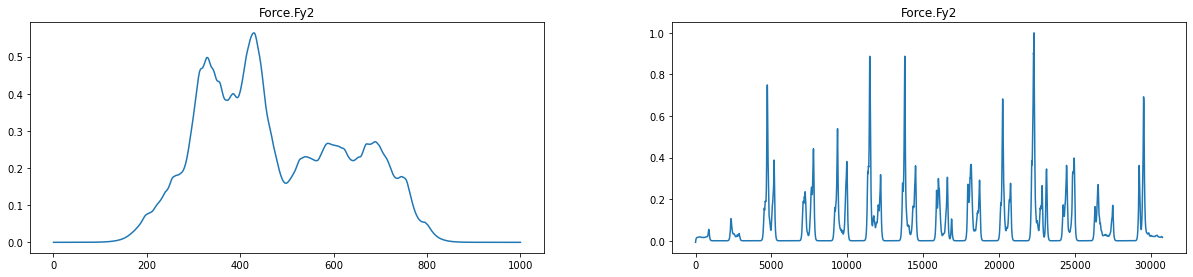

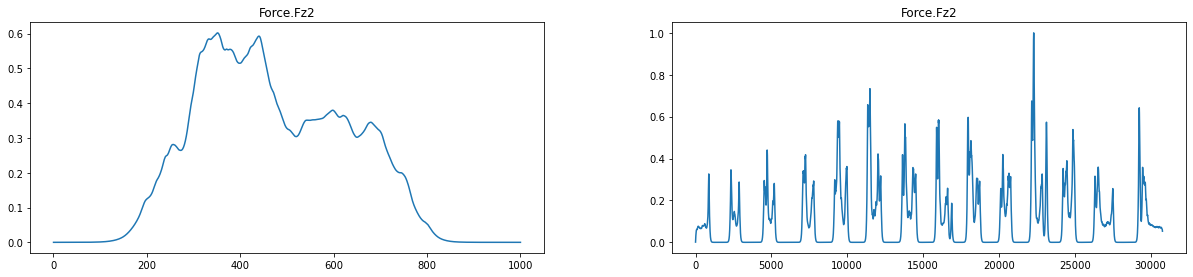

In [18]:
show_events_average(processed,path)